<a href="https://colab.research.google.com/github/kulight/fpt_clusttering/blob/master/fpt_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
gpath = '/content/drive/My Drive/datasets/'
df = pd.read_csv(f'{gpath}data-final.csv', sep='\t')
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


## Clearing of multipile IPC's to limit. allowing higher multi-IPCs in order to include public IPs

In [4]:
df = df.drop(df[(df.IPC > 1) & (df.IPC < 6)].index)

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(843811, 110)

#Rapid responders:

## questios time - milisec to sec:

In [7]:
q_t = df.columns.str.endswith('_E')
df.loc[:, q_t] = df.loc[:, q_t] / 1000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6119fa198>]],
      dtype=object)

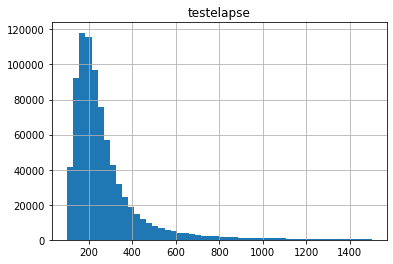

In [8]:
df.hist(column='testelapse', range=[100, 1500], bins=50)

## filtering rapid answers: we have set a 3 sec minimum of time to read and answer each question,
According to this limit - less than 150 secs for total answering time is too fast and reflects inattention to questions

In [9]:
df = df.drop(df[(df.testelapse < 150) | (df.testelapse > 1000)].index)
df.shape

(695093, 110)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa60fe3b0f0>]],
      dtype=object)

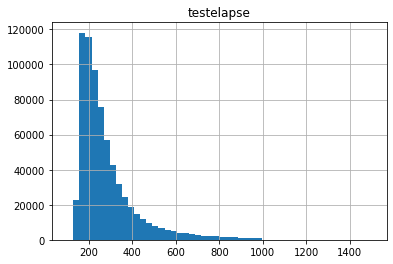

In [10]:
df.hist(column='testelapse', range=[100, 1500], bins = 50)

In [11]:
df = df.replace(0, np.nan)

## Questions data:

### Invertion of all negatively oriented questions to positive orientation

In [12]:
negatively_keyed = ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10',
                    'EST2', 'EST4',
                    'AGR1', 'AGR3', 'AGR5', 'AGR7', 
                    'CSN2', 'CSN4', 'CSN6', 'CSN8', 
                    'OPN2', 'OPN4', 'OPN6']
df.loc[:, negatively_keyed] = 6 - df.loc[:, negatively_keyed]  

In [13]:
q_cols = df.columns[:50]

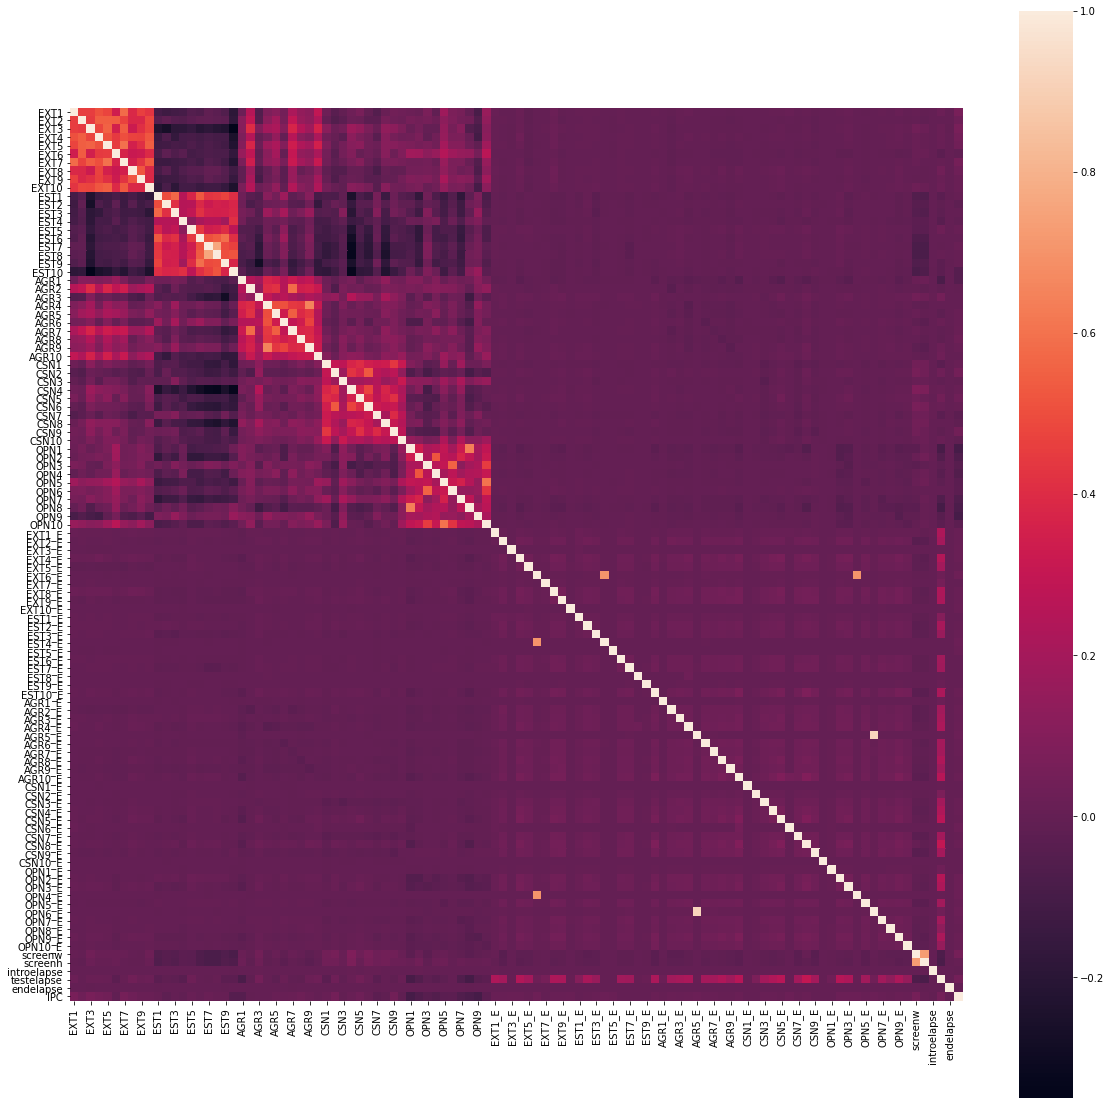

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), square=True, annot=False);

### Filtering multipile nulls: 

#### Filtering > 5 nulls in questions. < 5 cases will be imputed

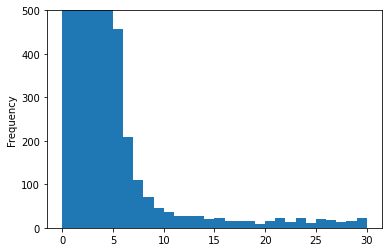

In [15]:
df['nulls'] = df[q_cols].isnull().sum(axis=1)
ax= df['nulls'].plot.hist(bins = 30, range=[0,30],ylim=(0,500))

In [16]:
df = df.loc[df['nulls'] < 5]
df.shape

(693546, 111)

## Working the questions columns

In [17]:
questions = pd.DataFrame(df.iloc[:,0:50])
questions.shape

(693546, 50)

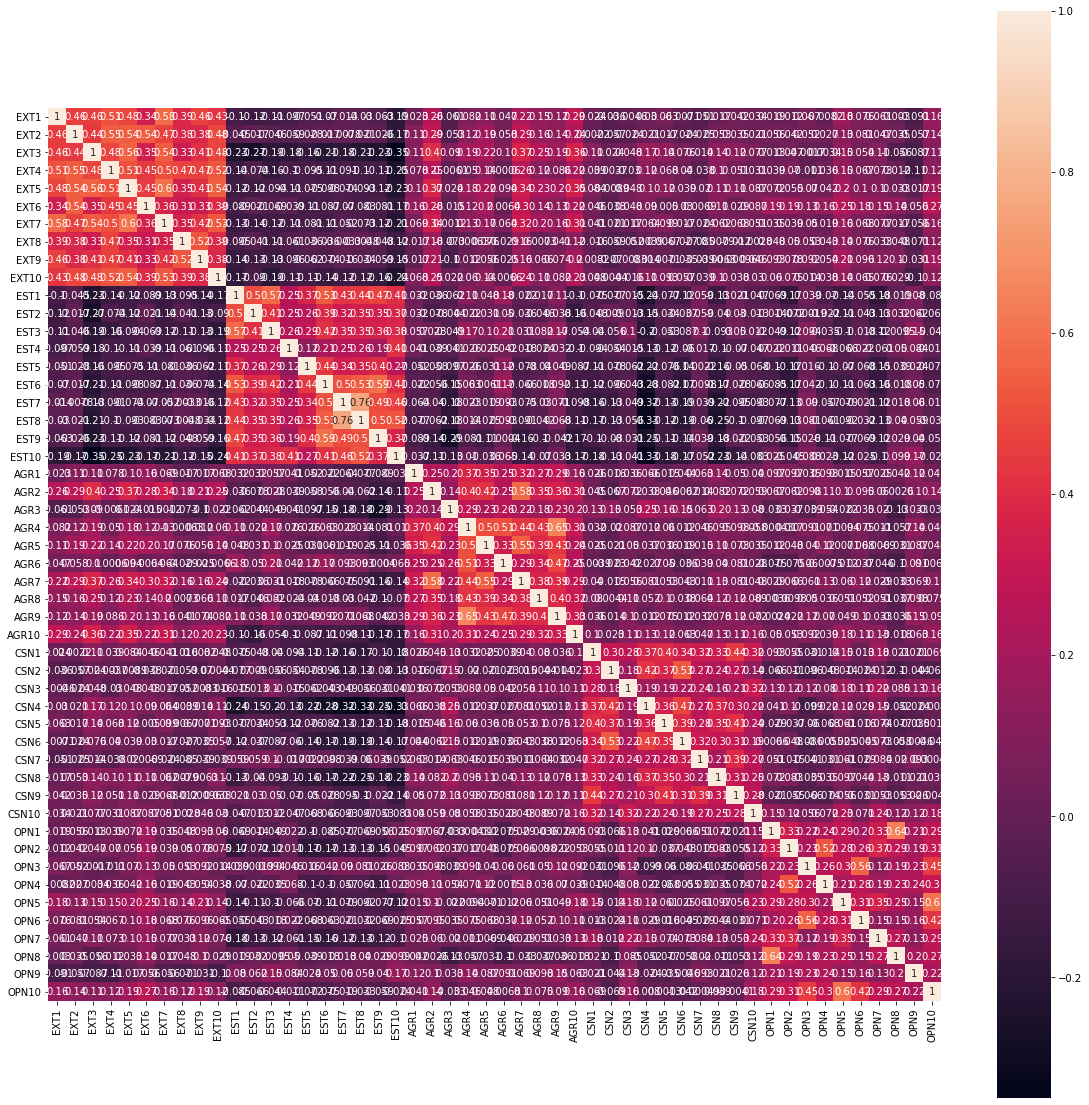

In [18]:
corrq = questions.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrq, square=True, annot=True);

## Exploring for highly correlated questions

In [19]:
corrdf= pd.DataFrame(corrq)

corr_df = corrdf.rename_axis(None).rename_axis(None, axis=1)

corr_df = corr_df.stack().reset_index()
corr_df.columns = ['a','b','corr']

### Remove duplicates corrs

In [20]:
dupes = (corr_df[['a', 'b']].apply(frozenset, axis=1).duplicated())
corr_df = corr_df.loc[~dupes]

#remove YY corrs
corr_df = corr_df.loc[corr_df['a'] != corr_df['b']]
corrdf.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
EXT1,1.000000,0.455236,0.456646,0.509954,0.477631,0.338492,0.580574,0.386241,0.459031,0.428689,-0.100677,-0.124789,-0.109491,-0.097215,-0.050674,-0.070053,-0.013699,-0.030428,-0.062711,-0.187568,0.023343,0.256127,-0.061488,0.082223,0.109672,0.047244,0.220607,0.145849,0.123165,0.290095,0.024402,-0.035528,-0.004632,0.030209,0.062978,-0.007090,-0.051247,0.017442,0.042109,0.034354,0.019488,0.011911,0.067325,-0.008242,0.179886,0.076343,0.061179,0.003012,-0.090951,0.157455
EXT2,0.455236,1.000000,0.442593,0.545548,0.542475,0.538108,0.469531,0.382867,0.381998,0.481330,-0.045225,-0.017321,-0.046374,-0.058720,-0.028291,-0.016575,-0.007835,-0.021166,-0.025716,-0.174835,0.111695,0.290239,-0.052632,0.118907,0.192364,0.057907,0.289653,0.160107,0.135222,0.235261,0.002174,-0.057293,-0.024393,0.020737,0.016579,-0.023525,-0.025370,0.052768,0.035166,0.020903,0.055762,0.042053,0.051821,0.026967,0.128551,0.081081,0.047356,0.035208,-0.057433,0.139234
EXT3,0.456646,0.442593,1.000000,0.475320,0.556809,0.349450,0.538919,0.325232,0.409761,0.475163,-0.231251,-0.269013,-0.188390,-0.184807,-0.159957,-0.205200,-0.183393,-0.212725,-0.228314,-0.349981,0.108991,0.403709,0.090364,0.194028,0.222896,0.102087,0.367913,0.250167,0.185762,0.360518,0.114896,0.024028,0.047885,0.173502,0.142314,0.076298,0.014257,0.138103,0.123614,0.076971,0.013336,0.047042,-0.001708,0.003440,0.149118,0.054494,0.107633,-0.056102,-0.086905,0.110915
EXT4,0.509954,0.545548,0.475320,1.000000,0.507906,0.445665,0.499437,0.472121,0.466865,0.523526,-0.139919,-0.073649,-0.161952,-0.099503,-0.094957,-0.109210,-0.090759,-0.102893,-0.106315,-0.253604,0.077707,0.246868,-0.006149,0.049708,0.144276,0.000602,0.257647,0.115722,0.085510,0.222193,0.039465,0.003749,-0.030263,0.123610,0.068376,0.039644,-0.037855,0.103985,0.051465,0.030740,0.038631,0.069660,-0.011378,0.036148,0.152043,0.067447,0.072728,0.012171,-0.107207,0.124180
EXT5,0.477631,0.542475,0.556809,0.507906,1.000000,0.450004,0.595776,0.352335,0.410452,0.542399,-0.122805,-0.115702,-0.094067,-0.105258,-0.075168,-0.097576,-0.073882,-0.092876,-0.116226,-0.228443,0.103115,0.374459,0.023776,0.177223,0.222141,0.093905,0.335217,0.233532,0.195432,0.350717,0.084086,-0.008881,0.047867,0.104375,0.121831,0.038811,0.019685,0.111716,0.108247,0.086851,0.072364,0.054809,0.069544,0.042062,0.199235,0.102167,0.100305,0.033258,-0.016980,0.185956


### Creating a list of all correlated questions above 0.5, as tupels

In [21]:
highcorr_df = corr_df.loc[abs(corr_df['corr'])> 0.5].sort_values(by='corr', ascending=False).reset_index(drop=True)

### No cross-trait correelations above 0.5 - questions are distinctive traitwise.

In [22]:
high_corr = [(a, b) for a, b in zip(highcorr_df['a'], highcorr_df['b'])]    
high_corr

[('EST7', 'EST8'),
 ('AGR4', 'AGR9'),
 ('OPN1', 'OPN8'),
 ('OPN5', 'OPN10'),
 ('EXT5', 'EXT7'),
 ('EST6', 'EST9'),
 ('AGR2', 'AGR7'),
 ('EXT1', 'EXT7'),
 ('EST1', 'EST3'),
 ('EXT3', 'EXT5'),
 ('OPN3', 'OPN6'),
 ('AGR5', 'AGR7'),
 ('EXT2', 'EXT4'),
 ('EXT2', 'EXT5'),
 ('EXT5', 'EXT10'),
 ('EXT3', 'EXT7'),
 ('EXT2', 'EXT6'),
 ('EST6', 'EST8'),
 ('CSN2', 'CSN6'),
 ('EST1', 'EST6'),
 ('EXT7', 'EXT10'),
 ('EXT8', 'EXT9'),
 ('EXT4', 'EXT10'),
 ('EST8', 'EST10'),
 ('OPN2', 'OPN4'),
 ('EXT1', 'EXT4'),
 ('EXT4', 'EXT5'),
 ('AGR4', 'AGR6'),
 ('EST6', 'EST7'),
 ('EST8', 'EST9')]

## Deviding question to traits: 

### Sum up to traits (from Luketina's kernel):

In [23]:
traits = ['EXT','EST','AGR','CSN','OPN']
q_dict = { f"df_{trait}" : questions.loc[:, questions.columns.str.startswith(trait)] for trait in traits }
orig_q_dict = deepcopy(q_dict)
for (key, value) in orig_q_dict.items():
    value[key[3:]] = value.sum(axis=1)

## Ploting inter trait correlation

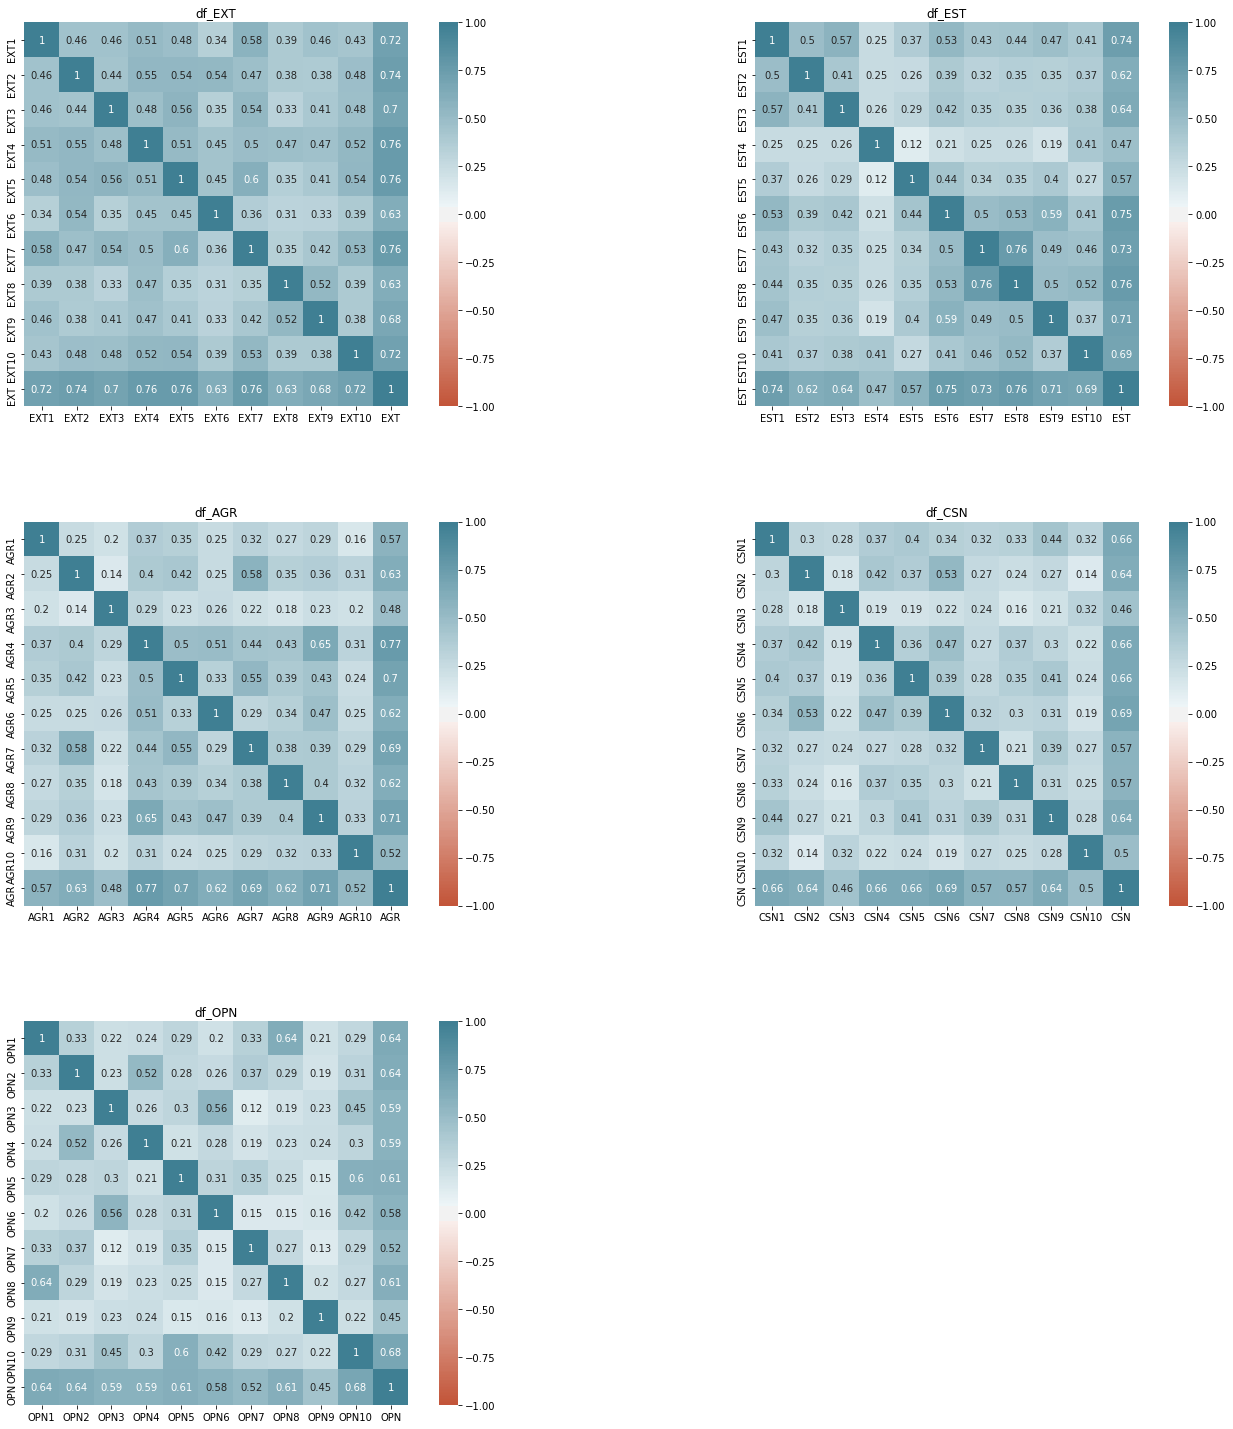

In [24]:
fig = plt.figure(figsize=(24,24))

for i, (key, value) in enumerate(orig_q_dict.items()):
    fig.add_subplot(3,2, i + 1)
    plt.title(f'{key}', fontsize=12)
    sns.heatmap(value.corr(), vmax=1, vmin=-1, center=0, square=True, cmap=sns.diverging_palette(20,220, n=300), annot=True)
    
fig.subplots_adjust(left= 0.125,right =0.9, bottom= 0.1, top= 0.9, wspace=0.2, hspace=0.3)
plt.show()

## Building an imputer for missing data

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [26]:
estimator = BayesianRidge()
imputer = IterativeImputer(random_state=0, estimator=estimator)

### Using iterative imputer to fill missing data for each question

In [27]:
imp_q_dict = deepcopy(q_dict)
for (key, value) in imp_q_dict.items():
    new_val = pd.DataFrame(imputer.fit_transform(value), columns=value.columns)
    new_val[key[3:]] = new_val.sum(axis=1)
    imp_q_dict[key] = new_val

Merge imputed data to single DF

In [28]:
fpt_list = [value for value in imp_q_dict.values()] 
questions = pd.concat(fpt_list, axis=1)

## Subject credebility score

Looking to analyze genuine subjects we tried to filter out unreliable cases. many questions in the big 5 test aim for same answer, only by different semantics. we concluded these double questions to examine subject's credebility.

### Extracting distance between questions: 0 - full compatibility 4 - total opposite.

In [29]:
cred_tuples= [('EXT1','EXT4'),('EXT7','EXT10'),('EXT8','EXT9'),
              ('EST1','EST2'),('EST7','EST8'),('EST10','EST4'),
              ('AGR2','AGR7'),('AGR4','AGR5'),('AGR4','AGR9'),
              ('CSN5','CSN8'),('CSN2','CSN6'),
              ('OPN3','OPN6'),('OPN1','OPN8')]

def distxy (tup):
    return abs(questions[tup[0]] - questions[tup[1]])

Checking how each distance is distributed:

From plots we can see that rougthly 70% of the cases is compatible to =<1 points.
One exception is CSN5-CSN8, which has low compatiblity. not supprising as corr is 0.35, relatively low.
on the other way, AGR4-AGR9 wasnt defined as 'couple', but shows high corr (0.64) and very compatible as well.
maybe we should go for high correlations for couples instead of textual meanings?

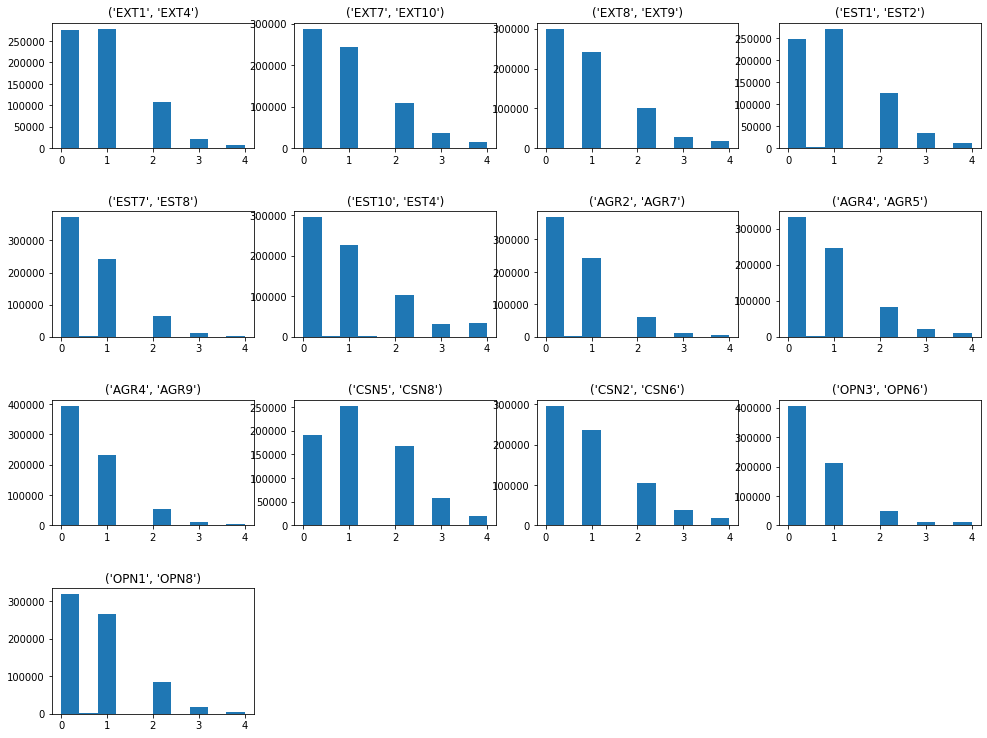

In [30]:
fig = plt.figure(figsize=(12,12))
for i, x in enumerate(cred_tuples):
    fig.add_subplot(4, 4, i + 1)
    plt.title(f'{x}', fontsize=12)
    plt.hist(distxy(x))
    
fig.subplots_adjust(left= 0.125,right =1.2, bottom= 0.1, top= 0.9, wspace=0.2, hspace=0.5)   
plt.show()

### Scoring subjects for credebility (0 - no credebility to 1 - max credebility)

In [31]:
from numpy import mean

def score_dist(dist):
    if dist < 2:
        return 2
    if dist > 2:
        return 0    
    return 1

def cred_score(row, corrlist):
    return sum([score_dist(abs(getattr(row, tup[0]) - getattr(row, tup[1]))) for tup in corrlist]) /(len(corrlist)*2)

In [32]:
questions['cred_score'] = [cred_score(row, high_corr) for row in questions.itertuples()]

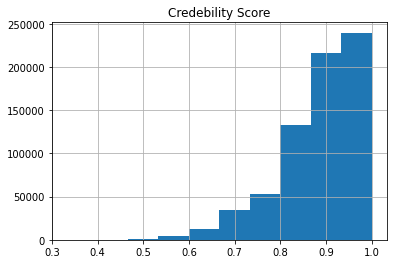

In [33]:
questions['cred_score'].hist()
plt.title('Credebility Score');

### Most subjects seems reliable
Filtering subjects with less than 0.8 cred score

In [34]:
questions = questions.loc[questions['cred_score'] > 0.8]

## Saving data to file

In [35]:
questions.to_csv(f'{gpath}five_p_eda.csv', index=False)